# Speed Dating

Contents
 1. [Problem](#section1)
   <a href="#section1"></a>
 2. [Obtaining Data ](#section2)
   <a href="#section2"></a>
 3. [Data Cleaning and Preparation ](#section3)
   <a href="#section3"></a>  
   * [Speed Dating Event data Key](#section31)
     <a href="#section31"></a>
   * [Survey before Speed Dating key](#section32)
     <a href="#section32"></a>
   * [Survey before Speed Dating key(part two)](#section33)
     <a href="#section33"></a>  
   * [Survey before Speed Dating key(part three) ](#section34)
     <a href="#section34"></a>
   * [Scorecard Dating key ](#section36)
     <a href="#section36"></a>  
   * [Checking and Correcting datatypes of chosen columns ](#section35)
     <a href="#section35"></a>  
 4. [Feature Engineering](#section4)
   <a href="#section4"></a>     
   * [Total Rating](#section41)
     <a href="#section41"></a>     
 5. [Exploratory Data Analysis (EDA)](#section5)
   <a href="#section5"></a>     
   * [Relation of interest correlation with subject's decision](#section51)
     <a href="#section51"></a>
   * [Relation of Choice with Subject's Decision](#section52)
     <a href="#section52"></a>
   * [Relation between Attributes and Subject's Decision](#section53)
     <a href="#section53"></a>  
   * [Relation between Met and Subject's Decision ](#section54)
     <a href="#section54"></a>
 6. [Correlation](#section6)
   <a href="#section6"></a>   
   * [Correlation Table ](#section61)
     <a href="#section61"></a>
   * [Heatmap ](#section62)
     <a href="#section62"></a>  
 7. [Model Development](#section7)
   <a href="#section7"></a>
   * [Feature Selection ](#section71)
     <a href="#section71"></a>
   * [Train,test split](#section72)
     <a href="#section72"></a> 
   * [RandomForest Algorithm ](#section73)
     <a href="#section73"></a>
 8. [Model Evaluation](#section8)
   <a href="#section7"></a>
   * [RandomForest Algorithm ](#section81)
     <a href="#section81"></a>
      * [Confusion Matrix](#section811)
        <a href="#section811"></a> 
      * [Classification Report ](#section812)
        <a href="#section812"></a>
      * [ROC-curve ](#section813)
        <a href="#section813"></a>    
   

<a id="section1"></a>

## 1. Problem

A dating company called "Lemon Law" is planning to come up with an app which predicts whether you like the opposite sex or not by bringing the speed dating experience online as both are made to fill a scorecard to rate their partner at the end of their five minute conversation.

To solve this problem, a predictive model is to be made by using the speed dating experiment dataset from kagg;e.

Speed dating dataset from kaggle will be used here to train and test the model. 

<a id="section2"></a>
## 2. Obtaining Data 

In [1]:
import pandas as pd
df=pd.read_csv("Speed Dating Data.csv", engine="python")
df.shape

(8378, 195)

### As dataset is too big for my laptop to handle, dataset will be reduced to the first four waves only

In [2]:
speedDF=df[(df["wave"]==1)| (df["wave"]==2) | (df["wave"]==3) | (df["wave"]==4)]
speedDF.shape

(1656, 195)

<a id="section3"></a>
## 3. Data Cleaning and  Preparation

<a id="section31"></a>
###  &nbsp; 3.1. Speed Dating Event data Key

1. iid: 	unique subject number, group(wave id gender)

2. id:  	subject number within wave

3. gender:	Female=0,Male=1

4. idg: 	subject number within gender, group(id gender)

5. condtn: 1=limited choice , 2=extensive choice

6. wave: The day on which the speed dating event takes place.

7. round:		number of people that met in wave

8. order: 		the number of date that night when met partner

9. partner: 	partner’s id number the night of event

10. pid: 		partner’s iid number

11. match		1=yes, 0=no

12. int_corr:	correlation between participant’s and partner’s ratings of interests in Time 1

13. samerace:  	participant and the partner were the same race. 1= yes, 0=no

14. age_o:		age of partner

15. race_o:		race of partner




In [3]:
all=["object","int64","float"]

In [4]:
col1=["iid","id","gender","idg","condtn","wave","round","order","partner","pid","match","int_corr","samerace","age_o","race_o"]

In [5]:
speedDF[col1].shape

(1656, 15)

In [6]:
speedDF[col1][speedDF["iid"]==11].head(11)

,iid,id,gender,idg,condtn,wave,round,order,partner,pid,match,int_corr,samerace,age_o,race_o
100,11,1.0,1,2,1,1,10,4,1,1.0,0,0.14,0,21.0,4.0
101,11,1.0,1,2,1,1,10,10,2,2.0,0,0.29,1,24.0,2.0
102,11,1.0,1,2,1,1,10,6,3,3.0,0,-0.24,1,25.0,2.0
103,11,1.0,1,2,1,1,10,3,4,4.0,0,-0.18,1,23.0,2.0
104,11,1.0,1,2,1,1,10,1,5,5.0,0,-0.43,1,21.0,2.0
105,11,1.0,1,2,1,1,10,5,6,6.0,0,0.33,0,23.0,4.0
106,11,1.0,1,2,1,1,10,2,7,7.0,0,0.19,0,22.0,4.0
107,11,1.0,1,2,1,1,10,7,8,8.0,0,-0.03,1,25.0,2.0
108,11,1.0,1,2,1,1,10,8,9,9.0,0,0.19,0,26.0,6.0
109,11,1.0,1,2,1,1,10,9,10,10.0,0,0.30,1,26.0,2.0


In [7]:
speedDF[col1].describe(include=all)

,iid,id,gender,idg,condtn,wave,round,order,partner,pid,match,int_corr,samerace,age_o,race_o
count,1656.000000,1656.000000,1656.000000,1656.000000,1656.000000,1656.000000,1656.000000,1656.000000,1656.000000,1656.000000,1656.000000,1584.000000,1656.000000,1636.000000,1636.000000
mean,59.992754,8.461353,0.500000,16.355072,1.758454,2.782609,15.884058,8.442029,8.461353,59.992754,0.169082,0.156035,0.391304,25.636308,2.685819
std,31.510109,5.033034,0.500151,9.913804,0.428150,1.093164,3.450622,4.992347,5.033034,31.510109,0.374938,0.321716,0.488190,3.370007,1.223748
min,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,10.000000,1.000000,1.000000,1.000000,0.000000,-0.630000,0.000000,21.000000,1.000000
25%,34.000000,4.000000,0.000000,8.000000,2.000000,2.000000,16.000000,4.000000,4.000000,34.000000,0.000000,-0.070000,0.000000,23.000000,2.000000
50%,57.500000,8.000000,0.500000,15.000000,2.000000,3.000000,18.000000,8.000000,8.000000,57.500000,0.000000,0.155000,0.000000,25.000000,2.000000
75%,88.250000,12.000000,1.000000,24.000000,2.000000,4.000000,18.000000,12.000000,12.000000,88.250000,0.000000,0.410000,1.000000,28.000000,4.000000
max,111.000000,20.000000,1.000000,36.000000,2.000000,4.000000,19.000000,19.000000,20.000000,111.000000,1.000000,0.900000,1.000000,39.000000,6.000000


### Correlation between subject and partner's interests  column (int_corr)

In [8]:
speedDF["int_corr"][speedDF["int_corr"].isnull()]="NaN"
median=speedDF["int_corr"].median()
speedDF["int_corr"][speedDF["int_corr"]=="NaN"]=median

D:\Anaconda\envs\Resume Project1\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\Toshiba\AppData\Roaming\Python\Python37\site-packages\pandas\core\generic.py:9116: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)
D:\Anaconda\envs\Resume Project1\lib\site-packages\IPython\core\interactiveshell.py:3331: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#

### Partner's age column (age_o)

In [9]:
speedDF["age_o"][speedDF["age_o"].isnull()]="NaN"
speedDF["age_o"][speedDF["age_o"]=="NaN"]=median
median=speedDF["age_o"].median()
median

D:\Anaconda\envs\Resume Project1\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
D:\Anaconda\envs\Resume Project1\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


25.0

In [10]:
speedDF["age_o"][speedDF["age_o"]=="NaN"]=median

D:\Anaconda\envs\Resume Project1\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


### Partner's race column (race_o)

In [11]:
speedDF["race_o"][speedDF["race_o"].isnull()]="NaN"

D:\Anaconda\envs\Resume Project1\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [12]:
speedDF["samerace"][(speedDF["race_o"]=="NaN")].value_counts()

0    20
Name: samerace, dtype: int64

None of these instances involve subject and partner of the same race.

### checking if 'race' column is up to date

In [13]:
speedDF["race"].describe()

count    1636.000000
mean        2.685819
std         1.223748
min         1.000000
25%         2.000000
50%         2.000000
75%         4.000000
max         6.000000
Name: race, dtype: float64

It's incomplete and has equal number of empty instances when compared to 'race_o' column. 

In [14]:
speedDF["race_o"].value_counts()

2.0    956
4.0    326
3.0    152
6.0    104
1.0     98
NaN     20
Name: race_o, dtype: int64

as majority of them have the value two, the missing instances too will be assigned the same value. 

In [15]:
speedDF["race_o"][(speedDF["race_o"]=="NaN")]=2.0

D:\Anaconda\envs\Resume Project1\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [16]:
speedDF[col1].describe(include=all)

,iid,id,gender,idg,condtn,wave,round,order,partner,pid,match,int_corr,samerace,age_o,race_o
count,1656.000000,1656.000000,1656.000000,1656.000000,1656.000000,1656.000000,1656.000000,1656.000000,1656.000000,1656.000000,1656.000000,1656.000,1656.000000,1656.0,1656.0
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,137.000,NaN,15.0,5.0
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.155,NaN,23.0,2.0
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,72.000,NaN,227.0,976.0
mean,59.992754,8.461353,0.500000,16.355072,1.758454,2.782609,15.884058,8.442029,8.461353,59.992754,0.169082,NaN,0.391304,NaN,NaN
std,31.510109,5.033034,0.500151,9.913804,0.428150,1.093164,3.450622,4.992347,5.033034,31.510109,0.374938,NaN,0.488190,NaN,NaN
min,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,10.000000,1.000000,1.000000,1.000000,0.000000,NaN,0.000000,NaN,NaN
25%,34.000000,4.000000,0.000000,8.000000,2.000000,2.000000,16.000000,4.000000,4.000000,34.000000,0.000000,NaN,0.000000,NaN,NaN
50%,57.500000,8.000000,0.500000,15.000000,2.000000,3.000000,18.000000,8.000000,8.000000,57.500000,0.000000,NaN,0.000000,NaN,NaN
75%,88.250000,12.000000,1.000000,24.000000,2.000000,4.000000,18.000000,12.000000,12.000000,88.250000,0.000000,NaN,1.000000,NaN,NaN


<a id="section32"></a>
### &nbsp; 3.2. Survey before Speed Dating key:
1. age:        age of subject

2.  race:
	* Black/African American=1
	* European/Caucasian-American=2
	* Latino/Hispanic American=3
	* Asian/Pacific Islander/Asian-American=4
	* Native American=5
	* Other=6

3. imprace:
   How important is it to you (on a scale of 1-10) that a person you date be of the same racial/ethnic background?

4. imprelig:
   How important is it to you (on a scale of 1-10) that a person you date be of the same religious background?

5. from:
   Where are you from originally (before coming to Columbia)? 

6. goal:
   What is your primary goal in participating in this event? 
	* Seemed like a fun night out=1
	* To meet new people=2
	* To get a date=3
	* Looking for a serious relationship=4
	* To say I did it=5
	* Other=6
7. date:
   In general, how frequently do you go on dates? 
	* Several times a week=1
	* Twice a week=2
	* Once a week=3
	* Twice a month=4
	* Once a month=5
	* Several times a year=6
	* Almost never=7

8. go out:
   How often do you go out (not necessarily on dates)?
	* Several times a week=1
	* Twice a week=2
	* Once a week=3
	* Twice a month=4
	* Once a month=5
	* Several times a year=6
	* Almost never=7

7. career:
   What is your intended career?

8. career_c: career coded 
   * 1= Lawyer 
   * 2= Academic/Research 
   * 3= Psychologist 
   * 4= Doctor/Medicine 
   * 5=Engineer 
   * 6= Creative Arts/Entertainment 
   * 7= Banking/Consulting/Finance/Marketing/Business/CEO/Entrepreneur/Admin 
   * 8= Real Estate 
   * 9= International/Humanitarian Affairs 
   * 10= Undecided 
   * 11=Social Work
   * 12=Speech Pathology
   * 13=Politics
   * 14=Pro sports/Athletics
   * 15=Other 
   * 16=Journalism
   * 17=Architecture


   How interested are you in the following activities, on a scale of 1-10?
9. sports: Playing sports/ athletics
10. tvsports: Watching sports
11. excersice: Body building/exercising
12. dining: Dining out
13. museums: Museums/galleries
14. art: Art
15. hiking:  Hiking/camping
16. gaming: Gaming
17. clubbing: Dancing/clubbing
18. reading: Reading
19. tv: Watching TV
20. theater: Theater
21. movies: Movies
22. concerts: Going to concerts
23. music: Music
24. shopping: Shopping
25. yoga: Yoga/meditation

26. exphappy:
    Overall, on a scale of 1-10, how happy do you expect to be with the people you meet 
    during the speed-dating event?

27. expnum: 
    Out of the 20 people you will meet, how many do you expect will be interested in dating you? 


In [17]:

col2=["age","race","imprace","imprelig","from","goal","date","go_out","career","career_c","exphappy","expnum"]
col3=["sports","tvsports","exercise","dining","museums","art","hiking","gaming","clubbing","reading","tv","theater","movies","concerts","music","shopping","yoga"]


In [18]:
speedDF[col2].shape

(1656, 12)

In [19]:
speedDF[col2].describe(include=all)

,age,race,imprace,imprelig,from,goal,date,go_out,career,career_c,exphappy,expnum
count,1636.000000,1636.000000,1620.000000,1620.000000,1620,1620.000000,1620.000000,1620.000000,1620,1571.000000,1620.000000,1620.000000
unique,NaN,NaN,NaN,NaN,74,NaN,NaN,NaN,81,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,Israel,NaN,NaN,NaN,Lawyer,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,74,NaN,NaN,NaN,72,NaN,NaN,NaN
mean,25.636308,2.685819,3.828395,3.971605,NaN,2.279630,5.099383,2.162346,NaN,4.733291,5.564815,5.238889
std,3.370007,1.223748,2.901118,2.933133,NaN,1.656836,1.439108,1.274132,NaN,3.208592,1.597209,4.362975
min,21.000000,1.000000,1.000000,1.000000,NaN,1.000000,1.000000,1.000000,NaN,1.000000,1.000000,0.000000
25%,23.000000,2.000000,1.000000,1.000000,NaN,1.000000,4.000000,1.000000,NaN,2.000000,5.000000,2.000000
50%,25.000000,2.000000,3.000000,3.000000,NaN,2.000000,5.000000,2.000000,NaN,5.000000,6.000000,4.000000
75%,28.000000,4.000000,6.000000,6.000000,NaN,2.000000,6.000000,3.000000,NaN,7.000000,7.000000,7.000000


###  &nbsp; (a) Subject's Age

In [20]:
speedDF["age"][speedDF["age"].isnull()]="NaN"
median=speedDF["age"].median()
speedDF["age"][speedDF["age"]=="NaN"]=median

D:\Anaconda\envs\Resume Project1\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
D:\Anaconda\envs\Resume Project1\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


### &nbsp; (b) Subject's Race

In [21]:
speedDF["race"].value_counts()

2.0    956
4.0    326
3.0    152
6.0    104
1.0     98
Name: race, dtype: int64

In [22]:
speedDF["race"][speedDF["race"].isnull()]=2.0

D:\Anaconda\envs\Resume Project1\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


### &nbsp; (c) 'Imprace' column

In [23]:
speedDF["imprace"].value_counts()

1.0     528
2.0     233
8.0     162
3.0     159
6.0     137
4.0     131
9.0      80
7.0      72
5.0      63
10.0     55
Name: imprace, dtype: int64

In [24]:
speedDF["imprace"][speedDF["imprace"].isnull()]=1.0


D:\Anaconda\envs\Resume Project1\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


### &nbsp; (d) 'Imprelig' column

In [25]:
speedDF["imprelig"].value_counts()

1.0     504
2.0     215
3.0     151
8.0     146
6.0     127
4.0     125
5.0     116
9.0      83
7.0      80
10.0     73
Name: imprelig, dtype: int64

In [26]:
speedDF["imprelig"][speedDF["imprelig"].isnull()]=1.0

D:\Anaconda\envs\Resume Project1\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


### &nbsp; (e)  'from' column

In [27]:
speedDF["from"].value_counts()

Israel                      74
New York                    73
Texas                       64
California                  53
Philadelphia                48
                            ..
Palo Alto, California       10
Tuscaloosa, Alabama         10
94115                       10
Torrance, CA                10
Palm Springs, California    10
Name: from, Length: 74, dtype: int64

As the column is too diverse to choose a majority, the missing instances would be filled with 'Columbia'

In [28]:
speedDF["from"][speedDF["from"].isnull()]="Columbia"

D:\Anaconda\envs\Resume Project1\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


### &nbsp; (f) 'goal' column

In [29]:
speedDF["goal"].value_counts()

1.0    716
2.0    504
5.0    157
6.0    139
3.0     66
4.0     38
Name: goal, dtype: int64

In [30]:
speedDF["goal"][speedDF["goal"].isnull()]=1.0

D:\Anaconda\envs\Resume Project1\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


### &nbsp; (g) 'date' column

In [31]:
speedDF["date"].value_counts()

6.0    475
5.0    341
4.0    308
7.0    272
3.0    168
1.0     46
2.0     10
Name: date, dtype: int64

In [32]:
speedDF["date"][speedDF["date"].isnull()]=6.0

D:\Anaconda\envs\Resume Project1\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


### &nbsp; (g) 'go_out' ,'career' ,'career_c', 'exphappy', 'expnum' columns

In [33]:
speedDF["go_out"].value_counts()

1.0    588
2.0    546
3.0    261
4.0    159
7.0     37
5.0     29
Name: go_out, dtype: int64

The missing instances will be replaced with 2.0, regardless of 1.0 having the majority as people generally go out for twice a week.

In [34]:
speedDF["go_out"][speedDF["go_out"].isnull()]=2.0

D:\Anaconda\envs\Resume Project1\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [35]:
speedDF["career"].value_counts()

Lawyer                               72
Academic                             66
lawyer                               65
Law                                  65
Social Worker                        62
                                     ..
Journalist                           10
research/financial industry          10
Engineer or iBanker or consultant    10
Academia, Research, Banking, Life    10
Corporate attorney                   10
Name: career, Length: 81, dtype: int64

From above, most of them intend to be a Lawyer. So, missing instances will be filled with 'Lawyer' as a career they are passionate about.

In [36]:
speedDF["career"][speedDF["career"].isnull()]="Lawyer"

D:\Anaconda\envs\Resume Project1\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [37]:
speedDF["career"][speedDF["career_c"].isnull()].unique()

array(['lawyer', 'law', 'Economist', 'Lawyer', 'tech professional'],
      dtype=object)

In [38]:
speedDF["career_c"][speedDF["career_c"].isnull()]="NaN"

D:\Anaconda\envs\Resume Project1\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [39]:
speedDF["career_c"].value_counts()

1.0     341
7.0     340
2.0     337
9.0     184
6.0     119
NaN      85
5.0      81
4.0      53
10.0     44
11.0     36
3.0      26
14.0     10
Name: career_c, dtype: int64

In [40]:
for i in range(0,len(speedDF)):
    if speedDF.loc[i,"career_c"]=="NaN":
        if speedDF.loc[i,"career"].startswith("law") or speedDF.loc[i,"career"].startswith("Law"):
            speedDF.loc[i,"career_c"]=1.0
        elif speedDF.loc[i,"career"]=="Economist":
            speedDF.loc[i,"career_c"]=7.0
        elif speedDF.loc[i,"career"]=="tech professional":
            speedDF.loc[i,"career_c"]=5.0 
        else:
            continue;
    else:
        continue;

C:\Users\Toshiba\AppData\Roaming\Python\Python37\site-packages\pandas\core\indexing.py:480: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [41]:
speedDF["exphappy"].value_counts()

5.0     484
7.0     366
6.0     328
3.0     149
4.0     118
8.0      65
9.0      48
2.0      42
10.0     10
1.0      10
Name: exphappy, dtype: int64

In [42]:
median=speedDF["exphappy"].median()
speedDF["exphappy"][speedDF["exphappy"].isnull()]= median

D:\Anaconda\envs\Resume Project1\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [43]:
speedDF["expnum"].value_counts()

3.0     270
2.0     260
5.0     210
4.0     175
10.0    148
1.0     104
0.0      94
6.0      91
8.0      51
9.0      39
7.0      38
18.0     36
15.0     30
12.0     26
20.0     20
14.0     18
19.0     10
Name: expnum, dtype: int64

In [44]:
median=speedDF["expnum"].median()
speedDF["expnum"][speedDF["expnum"].isnull()]=median

D:\Anaconda\envs\Resume Project1\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [45]:
speedDF[col2].describe(include=all)

,age,race,imprace,imprelig,from,goal,date,go_out,career,career_c,exphappy,expnum
count,1656.0,1656.000000,1656.000000,1656.000000,1656,1656.000000,1656.000000,1656.000000,1656,1656.000000,1656.000000,1656.000000
unique,14.0,NaN,NaN,NaN,75,NaN,NaN,NaN,81,NaN,NaN,NaN
top,23.0,NaN,NaN,NaN,Israel,NaN,NaN,NaN,Lawyer,NaN,NaN,NaN
freq,227.0,NaN,NaN,NaN,74,NaN,NaN,NaN,108,NaN,NaN,NaN
mean,NaN,2.677536,3.766908,3.907005,NaN,2.251812,5.118961,2.158816,NaN,4.623792,5.574275,5.211957
std,NaN,1.218638,2.898903,2.933264,NaN,1.649315,1.429420,1.260420,NaN,3.202777,1.581017,4.319044
min,NaN,1.000000,1.000000,1.000000,NaN,1.000000,1.000000,1.000000,NaN,1.000000,1.000000,0.000000
25%,NaN,2.000000,1.000000,1.000000,NaN,1.000000,4.000000,1.000000,NaN,2.000000,5.000000,2.000000
50%,NaN,2.000000,3.000000,3.000000,NaN,2.000000,5.000000,2.000000,NaN,5.000000,6.000000,4.000000
75%,NaN,4.000000,6.000000,6.000000,NaN,2.000000,6.000000,3.000000,NaN,7.000000,7.000000,7.000000


<a id="section33"></a>
###  &nbsp; 3.3. Survey before Speed Dating key(part two)

In [46]:
speedDF[col3].describe(include=all)

,sports,tvsports,exercise,dining,museums,art,hiking,gaming,clubbing,reading,tv,theater,movies,concerts,music,shopping,yoga
count,1620.000000,1620.000000,1620.000000,1620.000000,1620.000000,1620.000000,1620.000000,1620.000000,1620.000000,1620.000000,1620.000000,1620.000000,1620.000000,1620.000000,1620.000000,1620.000000,1620.000000
mean,6.285185,4.716667,6.035185,7.569753,6.698765,6.312963,5.427778,3.905556,6.142593,7.434568,5.478395,6.867284,8.086420,6.750000,7.559259,5.416049,4.214198
std,2.717528,2.906718,2.467202,1.758263,2.020127,2.144319,2.609262,2.484113,2.212612,1.729743,2.438400,2.151528,1.494462,2.018101,1.802700,2.456236,2.780710
min,1.000000,1.000000,1.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,3.000000,1.000000,1.000000,1.000000,1.000000
25%,4.000000,2.000000,4.000000,7.000000,5.000000,5.000000,3.000000,1.000000,5.000000,6.000000,4.000000,5.000000,7.000000,6.000000,7.000000,3.000000,2.000000
50%,7.000000,4.000000,6.000000,8.000000,7.000000,6.000000,6.000000,4.000000,7.000000,8.000000,6.000000,7.000000,8.000000,7.000000,8.000000,5.000000,3.000000
75%,9.000000,7.000000,8.000000,9.000000,8.000000,8.000000,8.000000,6.000000,8.000000,9.000000,7.000000,8.250000,9.000000,8.000000,9.000000,7.000000,7.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000


In [47]:
speedDF[col3].shape

(1656, 17)

In [48]:
m1=speedDF["sports"].median()
m2=speedDF["tvsports"].median()
m3=speedDF["exercise"].median()
m4=speedDF["dining"].median()
m5=speedDF["museums"].median()
m6=speedDF["art"].median()
m7=speedDF["hiking"].median()
m8=speedDF["gaming"].median()
m9=speedDF["clubbing"].median()
m10=speedDF["reading"].median()
m11=speedDF["tv"].median()
m12=speedDF["theater"].median()
m13=speedDF["movies"].median()
m14=speedDF["concerts"].median()
m15=speedDF["music"].median()
m16=speedDF["shopping"].median()
m17=speedDF["yoga"].median()

In [49]:
speedDF["sports"][speedDF["sports"].isnull()]=m1
speedDF["tvsports"][speedDF["tvsports"].isnull()]=m2
speedDF["exercise"][speedDF["exercise"].isnull()]=m3
speedDF["dining"][speedDF["dining"].isnull()]=m4
speedDF["museums"][speedDF["museums"].isnull()]=m5
speedDF["art"][speedDF["art"].isnull()]=m6
speedDF["hiking"][speedDF["hiking"].isnull()]=m7
speedDF["gaming"][speedDF["gaming"].isnull()]=m8
speedDF["clubbing"][speedDF["clubbing"].isnull()]=m9
speedDF["reading"][speedDF["reading"].isnull()]=m10
speedDF["tv"][speedDF["tv"].isnull()]=m11
speedDF["theater"][speedDF["theater"].isnull()]=m12
speedDF["movies"][speedDF["movies"].isnull()]=m13
speedDF["concerts"][speedDF["concerts"].isnull()]=m14
speedDF["music"][speedDF["music"].isnull()]=m15
speedDF["shopping"][speedDF["shopping"].isnull()]=m16
speedDF["yoga"][speedDF["yoga"].isnull()]=m17

D:\Anaconda\envs\Resume Project1\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
D:\Anaconda\envs\Resume Project1\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
D:\Anaconda\envs\Resume Project1\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the i

In [50]:
speedDF[col3].describe(include=all)

,sports,tvsports,exercise,dining,museums,art,hiking,gaming,clubbing,reading,tv,theater,movies,concerts,music,shopping,yoga
count,1656.000000,1656.000000,1656.000000,1656.000000,1656.000000,1656.000000,1656.000000,1656.000000,1656.000000,1656.000000,1656.000000,1656.000000,1656.000000,1656.000000,1656.000000,1656.000000,1656.000000
mean,6.300725,4.701087,6.034420,7.579106,6.705314,6.306159,5.440217,3.907609,6.161232,7.446860,5.489734,6.870169,8.084541,6.755435,7.568841,5.407005,4.187802
std,2.689831,2.876831,2.440227,1.740167,1.998518,2.121360,2.582076,2.456985,2.191986,1.712814,2.412934,2.128087,1.478172,1.996364,1.784145,2.430133,2.755998
min,1.000000,1.000000,1.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,3.000000,1.000000,1.000000,1.000000,1.000000
25%,4.000000,2.000000,4.000000,7.000000,5.000000,5.000000,3.000000,2.000000,5.000000,6.000000,4.000000,5.000000,7.000000,6.000000,7.000000,4.000000,2.000000
50%,7.000000,4.000000,6.000000,8.000000,7.000000,6.000000,6.000000,4.000000,7.000000,8.000000,6.000000,7.000000,8.000000,7.000000,8.000000,5.000000,3.000000
75%,9.000000,7.000000,8.000000,9.000000,8.000000,8.000000,8.000000,6.000000,8.000000,9.000000,7.000000,8.000000,9.000000,8.000000,9.000000,7.000000,7.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000


<a id="section34"></a>
###  3.4. Survey before Speed Dating key (part three) 

1. We want to know what you look for in the opposite sex. 
   Waves 1-5, 10-21: You have 100 points to distribute among the following attributes -- give more points to those    
   attributes that are more important in a potential date, and fewer points to those attributes that are less important in a    potential date.  Total points must equal 100.
 
   * attr1_1: Attractive
   * sinc1_1: Sincere
   * intel1_1: Intelligent
   * fun1_1: Fun
   * amb1_1: Ambitious
   * shar1_1: Has shared interests/hobbies


2. What do you think the opposite sex looks for in a date?
   Waves 1-5 and 10-21: Please distribute 100 points among the following attributes -- give more points to those attributes    that you think are more important to members of the opposite sex when they are deciding whether to date someone.  Total   
   points must equal 100.

   * attr2_1: Attractive
   * sinc2_1: Sincere
   * int2_1: Intelligent
   * fun2_1: Fun
   * amb2_1: Ambitious
   * shar2_1: Has shared interests/hobbies

3. How do you think you measure up?
   Please rate your opinion of your own attributes, on a scale of 1-10 (be honest!):
   * attr3_1: Attractive
   * sinc3_1: Sincere
   * int3_1: Intelligent
   * fun3_1: Fun
   * amb3_1: Ambitious



In [51]:
col4=["attr1_1","sinc1_1","intel1_1","fun1_1","amb1_1","shar1_1"]

In [52]:
speedDF[col4].describe(include=all)

,attr1_1,sinc1_1,intel1_1,fun1_1,amb1_1,shar1_1
count,1620.000000,1620.000000,1620.000000,1620.000000,1620.000000,1620.000000
mean,23.253827,16.959815,22.177654,17.253025,9.685741,11.034012
std,12.971356,7.325834,7.608897,6.596653,7.388598,6.822803
min,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,15.000000,10.000000,20.000000,12.000000,5.000000,5.000000
50%,20.000000,20.000000,20.000000,18.000000,10.000000,10.000000
75%,30.000000,20.000000,25.000000,20.000000,15.000000,15.000000
max,100.000000,35.000000,50.000000,40.000000,53.000000,30.000000


In [53]:
m1=speedDF["attr1_1"].median()
m2=speedDF["sinc1_1"].median()
m3=speedDF["intel1_1"].median()
m4=speedDF["fun1_1"].median()
m5=speedDF["amb1_1"].median()
m6=speedDF["shar1_1"].median()

In [54]:
speedDF["attr1_1"][speedDF["attr1_1"].isnull()]=m1
speedDF["sinc1_1"][speedDF["sinc1_1"].isnull()]=m2
speedDF["intel1_1"][speedDF["intel1_1"].isnull()]=m3
speedDF["fun1_1"][speedDF["fun1_1"].isnull()]=m4
speedDF["amb1_1"][speedDF["amb1_1"].isnull()]=m5
speedDF["shar1_1"][speedDF["shar1_1"].isnull()]=m6

D:\Anaconda\envs\Resume Project1\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
D:\Anaconda\envs\Resume Project1\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
D:\Anaconda\envs\Resume Project1\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the i

In [55]:
col5=["attr2_1","sinc2_1","intel2_1","fun2_1","amb2_1","shar2_1"]

In [56]:
speedDF[col5].describe(include=all)

,attr2_1,sinc2_1,intel2_1,fun2_1,amb2_1,shar2_1
count,1620.000000,1620.000000,1620.000000,1620.000000,1620.000000,1620.000000
mean,32.215432,13.008025,15.067284,18.666667,10.281481,10.761111
std,16.573788,7.230046,6.346767,6.190810,6.432797,6.227842
min,10.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,20.000000,10.000000,10.000000,15.000000,5.000000,5.000000
50%,30.000000,15.000000,15.000000,20.000000,10.000000,10.000000
75%,40.000000,20.000000,20.000000,20.000000,14.000000,15.000000
max,95.000000,30.000000,40.000000,30.000000,30.000000,25.000000


In [57]:
m1=speedDF["attr2_1"].median()
m2=speedDF["sinc2_1"].median()
m3=speedDF["intel2_1"].median()
m4=speedDF["fun2_1"].median()
m5=speedDF["amb2_1"].median()
m6=speedDF["shar2_1"].median()

speedDF["attr2_1"][speedDF["attr2_1"].isnull()]=m1
speedDF["sinc2_1"][speedDF["sinc2_1"].isnull()]=m2
speedDF["intel2_1"][speedDF["intel2_1"].isnull()]=m3
speedDF["fun2_1"][speedDF["fun2_1"].isnull()]=m4
speedDF["amb2_1"][speedDF["amb2_1"].isnull()]=m5
speedDF["shar2_1"][speedDF["shar2_1"].isnull()]=m6

D:\Anaconda\envs\Resume Project1\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
D:\Anaconda\envs\Resume Project1\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
D:\Anaconda\envs\Resume Project1\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load st

In [58]:
col6=["attr3_1","sinc3_1","intel3_1","fun3_1","amb3_1"]

In [59]:
speedDF[col6].describe(include=all)

,attr3_1,sinc3_1,intel3_1,fun3_1,amb3_1
count,1620.000000,1620.000000,1620.000000,1620.000000,1620.000000
mean,6.806790,8.055556,8.301852,7.520370,7.066049
std,1.426937,1.417050,0.979529,1.731574,1.962265
min,3.000000,2.000000,5.000000,2.000000,2.000000
25%,6.000000,7.000000,8.000000,7.000000,6.000000
50%,7.000000,8.000000,8.000000,8.000000,7.500000
75%,8.000000,9.000000,9.000000,9.000000,8.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000


In [60]:
m1=speedDF["attr3_1"].median()
m2=speedDF["sinc3_1"].median()
m3=speedDF["intel3_1"].median()
m4=speedDF["fun3_1"].median()
m5=speedDF["amb3_1"].median()

In [61]:
speedDF["sinc3_1"].value_counts()

9.0     580
8.0     485
7.0     232
10.0    141
6.0      84
5.0      62
2.0      16
4.0      10
3.0      10
Name: sinc3_1, dtype: int64

In [62]:
speedDF["attr3_1"][speedDF["attr3_1"].isnull()]=m1
speedDF["sinc3_1"][speedDF["sinc3_1"].isnull()]=m2
speedDF["intel3_1"][speedDF["intel3_1"].isnull()]=m3
speedDF["fun3_1"][speedDF["fun3_1"].isnull()]=m4
speedDF["amb3_1"][speedDF["amb3_1"].isnull()]=m5

D:\Anaconda\envs\Resume Project1\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
D:\Anaconda\envs\Resume Project1\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
D:\Anaconda\envs\Resume Project1\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the i

<a id="section36"></a>
### 3.5. Scorecard Data key

1. Decision:dec 1=yes,0=no
	
2. Attributes
   (1=awful, 10=great)	
   * Attractive: attr
   * Sincere: sinc
   * Intelligent: intel
   * Fun: fun
   * Ambitious: amb
   * Shared Interests/Hobbies: shar
	
3. Overall, how much do you like this person?
   (1=don't like at all, 10=like a lot)-->like
 
4. How probable do you think it is that this person will say 'yes' for you?
   (1=not probable, 10=extremely probable)-->prob
 
5. Have you met this person before?
   (1=yes,2=no)-->met


In [63]:
col7=["dec","attr","sinc","intel","fun","amb","shar","like","prob","met"]

In [64]:
speedDF[col7].describe(include=all)

,dec,attr,sinc,intel,fun,amb,shar,like,prob,met
count,1656.000000,1635.000000,1618.000000,1619.000000,1595.000000,1531.000000,1447.000000,1633.000000,1612.000000,1615.000000
mean,0.412440,6.113761,7.189122,7.388820,6.365517,6.798824,5.467519,6.168096,4.867556,1.955418
std,0.492422,1.988852,1.721060,1.531496,2.006249,1.791691,2.114541,1.917110,2.180905,0.226484
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,5.000000,6.000000,7.000000,5.000000,6.000000,4.000000,5.000000,3.000000,2.000000
50%,0.000000,6.000000,7.000000,7.000000,7.000000,7.000000,5.000000,6.000000,5.000000,2.000000
75%,1.000000,8.000000,8.000000,8.000000,8.000000,8.000000,7.000000,7.000000,6.000000,2.000000
max,1.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,5.000000


In [65]:
m1=speedDF["attr"].median()
speedDF["attr"][speedDF["attr"].isnull()]=m1
m2=speedDF["sinc"].median()
speedDF["sinc"][speedDF["sinc"].isnull()]=m2
m3=speedDF["intel"].median()
speedDF["intel"][speedDF["intel"].isnull()]=m3
m4=speedDF["fun"].median()
speedDF["fun"][speedDF["fun"].isnull()]=m4
m5=speedDF["amb"].median()
speedDF["amb"][speedDF["amb"].isnull()]=m5
m6=speedDF["shar"].median()
speedDF["shar"][speedDF["shar"].isnull()]=m6

D:\Anaconda\envs\Resume Project1\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
D:\Anaconda\envs\Resume Project1\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
D:\Anaconda\envs\Resume Project1\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
D:\Anaconda\envs\Resume Project1\lib

In [66]:
m1=speedDF["like"].median()
m2=speedDF["prob"].median()
speedDF["like"][speedDF["like"].isnull()]=m1
speedDF["prob"][speedDF["prob"].isnull()]=m2

D:\Anaconda\envs\Resume Project1\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
D:\Anaconda\envs\Resume Project1\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [67]:
speedDF["met"][speedDF["met"].isnull()]="NaN"
speedDF["met"].value_counts()

D:\Anaconda\envs\Resume Project1\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


2.0    1537
1.0      76
NaN      41
5.0       1
3.0       1
Name: met, dtype: int64

In [68]:
speedDF["met"][speedDF["met"]=="NaN"]=2.0

D:\Anaconda\envs\Resume Project1\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [69]:
for i in range(0,len(speedDF)):
    if speedDF.loc[i,"met"]>2.0:
        speedDF.loc[i,"met"]=2.0
    else:
        continue;

In [70]:
speedDF[col7].describe(include=all)

,dec,attr,sinc,intel,fun,amb,shar,like,prob,met
count,1656.000000,1656.000000,1656.000000,1656.000000,1656.000000,1656.00000,1656.000000,1656.000000,1656.000000,1656.000000
mean,0.412440,6.112319,7.184783,7.380133,6.388889,6.81401,5.408514,6.165761,4.871075,1.954106
std,0.492422,1.976235,1.701422,1.515371,1.972554,1.72352,1.982612,1.903844,2.151824,0.209318
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,5.000000,6.000000,7.000000,5.000000,6.00000,4.000000,5.000000,3.000000,2.000000
50%,0.000000,6.000000,7.000000,7.000000,7.000000,7.00000,5.000000,6.000000,5.000000,2.000000
75%,1.000000,7.000000,8.000000,8.000000,8.000000,8.00000,7.000000,7.000000,6.000000,2.000000
max,1.000000,10.000000,10.000000,10.000000,10.000000,10.00000,10.000000,10.000000,10.000000,2.000000


In [71]:
speedDF["rating"]=(speedDF["attr"]+speedDF["sinc"]+speedDF["intel"]+speedDF["fun"]+speedDF["amb"]+speedDF["shar"])/6

D:\Anaconda\envs\Resume Project1\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [72]:
speedDF["int_corr"]=speedDF["int_corr"].astype(float)
speedDF["age_o"]=speedDF["age_o"].astype(int)
speedDF["race_o"]=speedDF["race_o"].astype(int)

D:\Anaconda\envs\Resume Project1\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
D:\Anaconda\envs\Resume Project1\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
D:\Anaconda\envs\Resume Project1\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inste

In [73]:
speedDF[col2].dtypes

age          object
race        float64
imprace     float64
imprelig    float64
from         object
goal        float64
date        float64
go_out      float64
career       object
career_c      int64
exphappy    float64
expnum      float64
dtype: object

In [74]:
speedDF["age"]=speedDF["age"].astype(int)

D:\Anaconda\envs\Resume Project1\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [75]:
speedDF[col3].dtypes

sports      float64
tvsports    float64
exercise    float64
dining      float64
museums     float64
art         float64
hiking      float64
gaming      float64
clubbing    float64
reading     float64
tv          float64
theater     float64
movies      float64
concerts    float64
music       float64
shopping    float64
yoga        float64
dtype: object

In [76]:
speedDF[col4].dtypes

attr1_1     float64
sinc1_1     float64
intel1_1    float64
fun1_1      float64
amb1_1      float64
shar1_1     float64
dtype: object

In [77]:
speedDF[col5].dtypes

attr2_1     float64
sinc2_1     float64
intel2_1    float64
fun2_1      float64
amb2_1      float64
shar2_1     float64
dtype: object

In [78]:
speedDF[col6].dtypes

attr3_1     float64
sinc3_1     float64
intel3_1    float64
fun3_1      float64
amb3_1      float64
dtype: object

<a id="section4"></a>
## 4. Feature Engineering

<a id="section41"></a>
### &nbsp; 4.1.  Total Rating

In [79]:
speedDF["rating"]=(speedDF["attr"]+speedDF["sinc"]+speedDF["intel"]+speedDF["fun"]+speedDF["amb"]+speedDF["shar"])/6

D:\Anaconda\envs\Resume Project1\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


The culmination of all attributes rated out of ten by the subject.

<a id="section5"></a>
## 5. Exploratory Data Analysis (EDA)

Checking relation of feature variables with target variable,which is column "match"

In [80]:
data=speedDF

In [81]:
import matplotlib.pyplot as plt
import seaborn as sns

<a id="section51"></a>
### &nbsp; 5.1. Relation of interest correlation with subject's decision

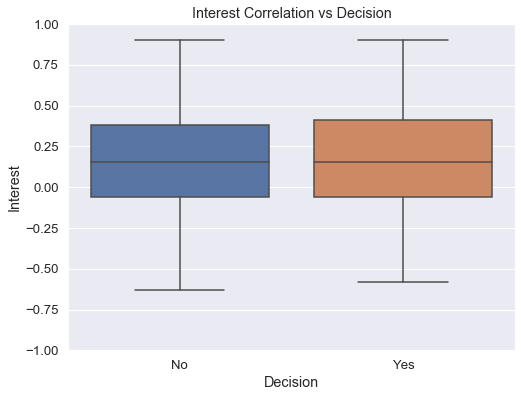

In [82]:
sns.set(font_scale=1.2)
fig,axs=plt.subplots(figsize=(8,6))
c1=sns.boxplot(y="int_corr",x="dec",data=data,ax=axs)
c1.set_xticklabels(["No","Yes"])
c1.set(ylabel="Interest")
c1.set(xlabel="Decision")
c1.set_title("Interest Correlation vs Decision")
c1.set(ylim=(-1,1))
plt.show(c1)

There is no relation between 'Interest correlation' and 'dec' column.

<a id="section52"></a>
### &nbsp; 5.2. Relation of Choice with Subject's Decision

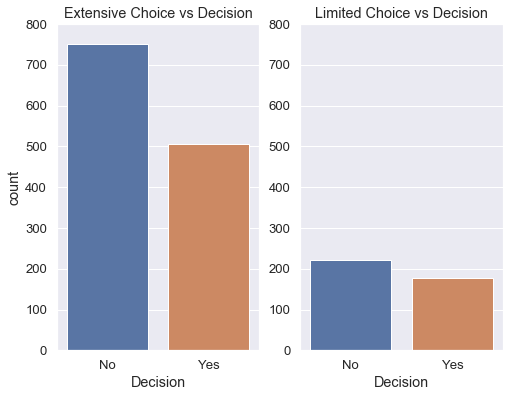

In [83]:
sns.set(font_scale=1.2)
fig,axs=plt.subplots(1,2,figsize=(8,6))
c1=sns.countplot(x="dec",data=data[data["condtn"]==2],ax=axs[0])
c1.set_xticklabels(["No","Yes"])
c1.set(ylim=(0,800))
c1.set(xlabel="Decision")
c1.set_title("Extensive Choice vs Decision")
c2=sns.countplot(x="dec",data=data[data["condtn"]==1],ax=axs[1])
c2.set_xticklabels(["No","Yes"])
c2.set(ylim=(0,800))
c2.set(ylabel="")
c2.set(xlabel="Decision")
c2.set_title("Limited Choice vs Decision")
plt.show(c1)
plt.show(c2)

There is no correlation between 'Choice' and 'dec' column

<a id="section53"></a>
### &nbsp; 5.3. Relation between Attributes and Subject's Decision column

Text(0.5, 1.0, 'Shared Interests vs Decision')

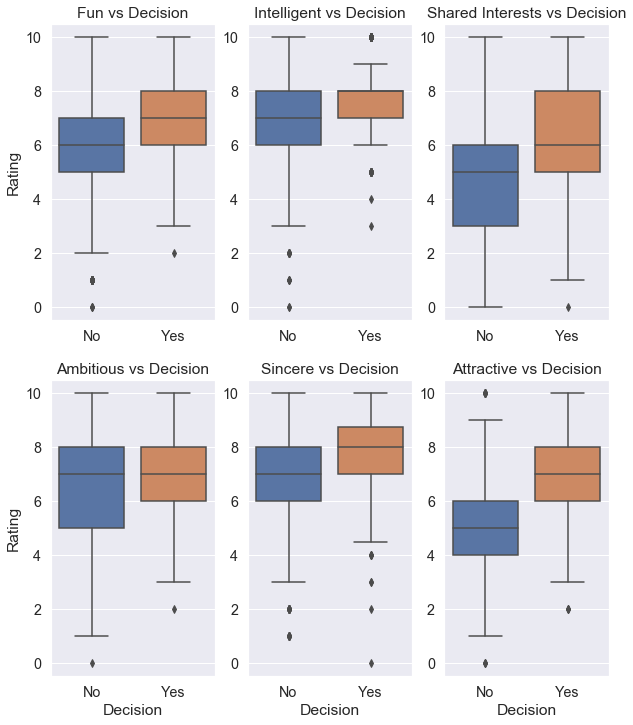

In [84]:
sns.set(font_scale=1.3)
fig,axs=plt.subplots(2,3,figsize=(10,12))
c1=sns.boxplot(y="fun",x="dec",data=data,ax=axs[0,0])
c1.set_xticklabels(["No","Yes"])
c1.set(ylabel="Rating")
c1.set(xlabel="")
c1.set_title("Fun vs Decision")

c2=sns.boxplot(y="intel",x="dec",data=data,ax=axs[0,1])
c2.set_xticklabels(["No","Yes"])
c2.set(ylabel="")
c2.set(xlabel="")
c2.set_title("Intelligent vs Decision")

c3=sns.boxplot(y="amb",x="dec",data=data,ax=axs[1,0])
c3.set_xticklabels(["No","Yes"])
c3.set(ylabel="Rating")
c3.set(xlabel="Decision")
c3.set_title("Ambitious vs Decision")

c4=sns.boxplot(y="sinc",x="dec",data=data,ax=axs[1,1])
c4.set_xticklabels(["No","Yes"])
c4.set(ylabel="")
c4.set(xlabel="Decision")
c4.set_title("Sincere vs Decision")


c5=sns.boxplot(y="attr",x="dec",data=data,ax=axs[1,2])
c5.set_xticklabels(["No","Yes"])
c5.set(ylabel="")
c5.set(xlabel="Decision")
c5.set_title("Attractive vs Decision")

c6=sns.boxplot(y="shar",x="dec",data=data,ax=axs[0,2])
c6.set_xticklabels(["No","Yes"])
c6.set(ylabel="")
c6.set(xlabel="")
c6.set_title("Shared Interests vs Decision")

Attractive, Shared Interests and Fun attributes from the scorecard have a significant correlation with subject's decision. On the other side Sincere, Ambitious and Intelligent have a moderately significant correlation with Match as it doesn't play a signifcant role in deciding whether subject likes their partner or not. 

<a id="section54"></a>
### &nbsp; 5.4. Relation between Met and Decision column

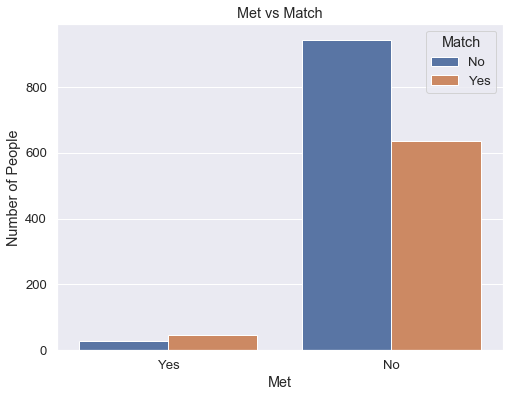

In [85]:
sns.set(font_scale=1.2)
fig,axs=plt.subplots(figsize=(8,6))
c1=sns.countplot(hue="dec",x="met",data=data,ax=axs)
c1.set_xticklabels(["Yes","No"])
c1.set(ylabel="Number of People")
c1.set(xlabel="Met")
c1.set_title("Met vs Match")
plt.legend(title='Match', loc='upper right',labels=['No', 'Yes'])
plt.show(c1)

Subject's decision is more likely to be positive if he/she hadn't met their partner before.

<a id="section6"></a>
##  6. Correlation

<a id="section61"></a>
### &nbsp; 6.1. Correlation Table

In [86]:
fcol=["attr","sinc","intel","fun","dec","amb","shar","met","rating"]

In [87]:
speedDF[fcol].corr()

,attr,sinc,intel,fun,dec,amb,shar,met,rating
attr,1.000000,0.403318,0.390928,0.570778,0.510562,0.299419,0.457712,-0.083937,0.715565
sinc,0.403318,1.000000,0.629749,0.479933,0.208997,0.422694,0.394339,-0.037252,0.728578
intel,0.390928,0.629749,1.000000,0.459152,0.208807,0.589148,0.408735,-0.074501,0.750900
fun,0.570778,0.479933,0.459152,1.000000,0.399296,0.448769,0.616143,-0.098699,0.814644
dec,0.510562,0.208997,0.208807,0.399296,1.000000,0.160922,0.385880,-0.091770,0.432850
amb,0.299419,0.422694,0.589148,0.448769,0.160922,1.000000,0.441770,-0.047123,0.701266
shar,0.457712,0.394339,0.408735,0.616143,0.385880,0.441770,1.000000,-0.146986,0.758713
met,-0.083937,-0.037252,-0.074501,-0.098699,-0.091770,-0.047123,-0.146986,1.000000,-0.112123
rating,0.715565,0.728578,0.750900,0.814644,0.432850,0.701266,0.758713,-0.112123,1.000000


<a id="section62"></a>
### &nbsp; 6.2. Plotting a Heatmap to visualize correlation


(9.0, 1.0)

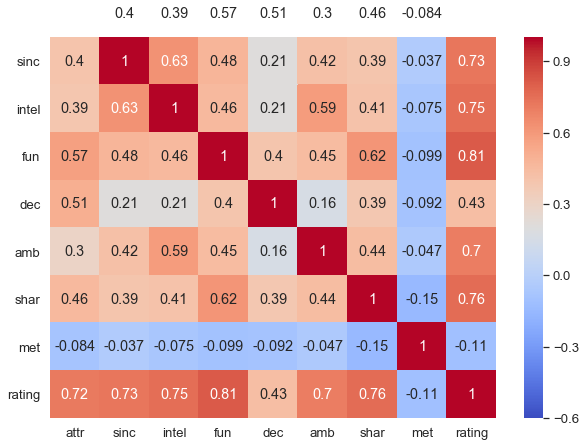

In [88]:
fig,ax=plt.subplots(figsize=(10,7))
heat=sns.heatmap(speedDF[fcol].corr(),vmax=1,vmin=-0.6,annot=True,ax=ax,cmap="coolwarm")
plt.yticks(rotation=0)
bottom,top=heat.get_ylim()
heat.set_ylim(bottom+0.5,top+0.5)

<a id="section7"></a>

## 7. Model Development using Pipeline


<a id="section71"></a>
###  &nbsp; 7.1. Feature Selection





After referring the above heatmap, following features are to be selected for the model.
  * rating
  * attr
  * fun
  * met

In [89]:
features=["rating","attr","fun","met"]


In [90]:
X=speedDF[features]
y=speedDF["dec"]

<a id="section72"></a>
###  &nbsp; 7.2. Train, test split


In [91]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X, y, test_size=0.3)

<a id="section73"></a>
### &nbsp; 7.3. RandomForest Algorithm

In [92]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
RF_pipeline = make_pipeline(SimpleImputer(), RandomForestClassifier( random_state=0))

RF_pipeline.fit(X_train, y_train)


Pipeline(memory=None,
         steps=[('simpleimputer',
                 SimpleImputer(add_indicator=False, copy=True, fill_value=None,
                               missing_values=nan, strategy='mean',
                               verbose=0)),
                ('randomforestclassifier',
                 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                        class_weight=None, criterion='gini',
                                        max_depth=None, max_features='auto',
                                        max_leaf_nodes=None, max_samples=None,
                                        min_impurity_decrease=0.0,
                                        min_impurity_split=None,
                                        min_samples_leaf=1, min_samples_split=2,
                                        min_weight_fraction_leaf=0.0,
                                        n_estimators=100, n_jobs=None,
                                        oob_score=F

In [93]:
RF_predictions= RF_pipeline.predict(X_test)

In [94]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, RF_predictions)

0.738430583501006

<a id="section8"></a>
### 8. Model Evaluation

In [95]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve
from sklearn.metrics import average_precision_score
from sklearn.metrics import precision_recall_curve

<a id="section81"></a>
###  8.1. RandomForest Algorithm

<a id="section811"></a>
###  &nbsp; 8.1.1. Confusion Matrix


In [96]:
import numpy as np
cm = pd.DataFrame(confusion_matrix(y_test, RF_predictions))
cm['Total'] = np.sum(cm, axis=1)
cm = cm.append(np.sum(cm, axis=0), ignore_index=True)
cm.columns = ['Predicted No', 'Predicted Yes', 'Total']
cm = cm.set_index([['Actual No', 'Actual Yes', 'Total']])
print(cm)

            Predicted No  Predicted Yes  Total
Actual No            216             63    279
Actual Yes            67            151    218
Total                283            214    497


<a id="section812"></a>
###  &nbsp; 8.1.2. Classification Report


In [97]:
print(classification_report(y_test, RF_predictions))

              precision    recall  f1-score   support

           0       0.76      0.77      0.77       279
           1       0.71      0.69      0.70       218

    accuracy                           0.74       497
   macro avg       0.73      0.73      0.73       497
weighted avg       0.74      0.74      0.74       497



<a id="section813"></a>
###  &nbsp; 8.1.3. ROC-curve


In [98]:
logit_roc_auc = roc_auc_score(y_test, RF_predictions) 

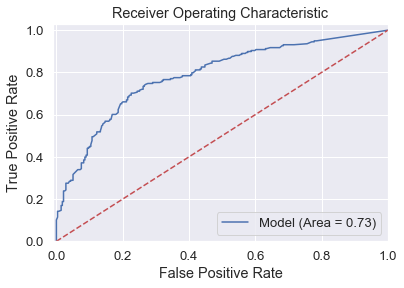

In [99]:
fpr, tpr, thresholds = roc_curve(y_test, RF_pipeline.predict_proba(X_test)[:,1]) 
plt.figure()
plt.plot(fpr, tpr, label='Model (Area = %0.2f)' % logit_roc_auc) 
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.01, 1.0])
plt.ylim([0.0, 1.03])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()